In [126]:
import random
import math
from collections import Counter
import matplotlib.pyplot as plt
from decimal import Decimal
from gmpy2 import digits
from scipy import stats
import numpy as np

In [157]:
def n_digit(x, n=1):
    x = Decimal(x)
    while x > 10:
        x /= 10
    for _ in range(n - 1):
        x = x % 1 * 10
    x = math.floor(x)
    if x == 10:
        if n == 1:
            x = 1
        else:
            x = 0
    return x


def gen_benford(n=1, samples=1000, iterations=10000, max_num=100000, base=10):
    rands = list(random.randint(0, max_num) for x in range(samples))
    for _ in range(samples * iterations):
        i = random.randrange(0, samples)
        rands[i] *= random.choice([1.01, 0.99])

    if base != 10:
        rands = [int(digits(math.floor(r), base)) for r in rands]
    
    return rands


def plot_benford(nums, n=1):
    benford_digits = [n_digit(x, n=n) for x in nums]

    counts = Counter(benford_digits)
    ratios = list(zip(*[(x, y / len(nums)) for x, y in counts.items()]))
    plt.bar(x=ratios[0], height=ratios[1])
    plt.show()
    return ratios


def gen_and_plot_benford(**kwargs):
    nums = gen_benford(**kwargs)
    return plot_benford(nums, n=kwargs.get('n', 1))

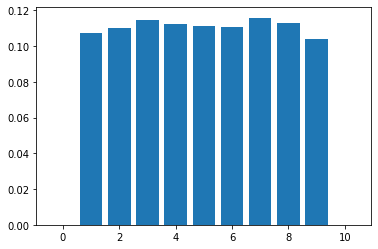

In [85]:
# RANDOM NUMBERS
samples = 10000
rands = (random.randint(0, 100000) for x in range(samples))

benford_digits = [n_digit(x) for x in rands]

counts = Counter(benford_digits)
ratios = list(zip(*[(x, y / samples) for x, y in counts.items()]))
plt.bar(x=ratios[0], height=ratios[1])
plt.show()

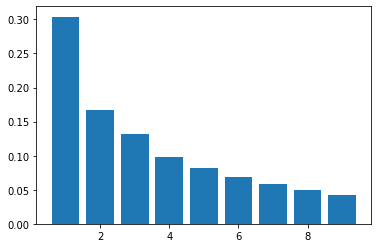

In [171]:
# RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios_first_digit = gen_and_plot_benford(samples=10000)

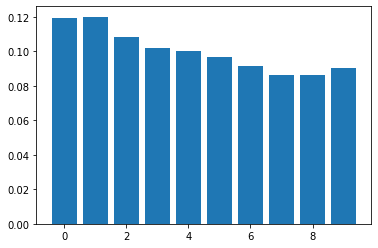

In [58]:
# SECOND DIGIT - RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios_second_digit = gen_and_plot_benford(n=2, samples=10000)

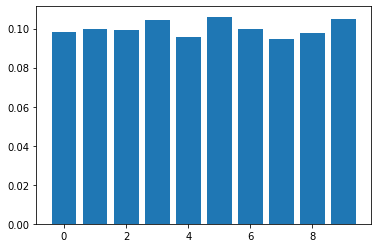

In [77]:
# THIRD DIGIT - RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios = gen_and_plot_benford(n=3, samples=10000)

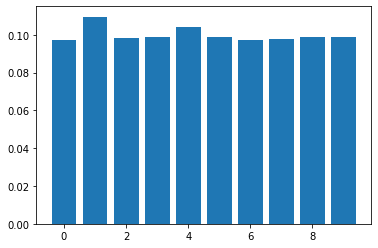

In [76]:
# FOURTH DIGIT - RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios = gen_and_plot_benford(n=4, samples=10000)

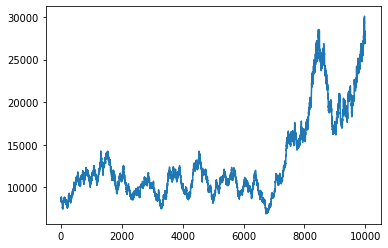

27198.196156573118


In [95]:
# EVOLUTION OF A NUMBER THROUGH MULTIPLICITIVE VARIANCES
arr = [random.randint(0, 10000)]
for _ in range(10000):
    arr.append(arr[-1] * random.choice([1.01, 0.99]))
plt.plot(arr)
plt.show()
print(arr[-1])

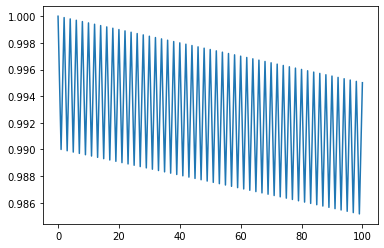

In [10]:
# EFFECT OF ALTERNATING VARIANCES
arr = [1]
for _ in range(50):
    arr.append(arr[-1] * 0.99)
    arr.append(arr[-1] * 1.01)
plt.plot(arr)
plt.show()

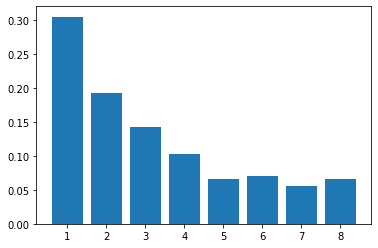

In [27]:
# BENFORD TO BASE 9
ratios = gen_and_plot_benford(base=9)

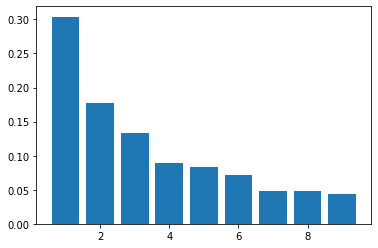

In [52]:
# ARBITRARY DIVISION
nums = gen_benford()
nums = [n / math.pi for n in nums]
ratios = plot_benford(nums)

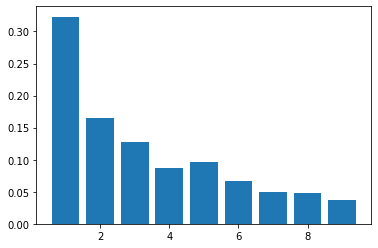

In [53]:
nums1 = [n * 5.12345 for n in nums]
ratios = plot_benford(nums1)

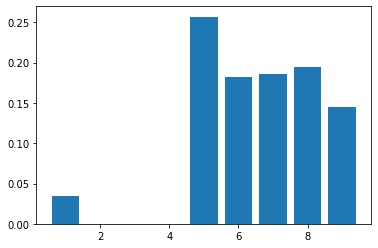

In [56]:
# MOVEMENT OF 1's AFTER ARBITRARY MULTIPLICATION
nums2 = [x for x in nums1 if n_digit(x, n=1) == 1]
nums3 = [n * 5.12345 for n in nums2]
ratios = plot_benford(nums3)

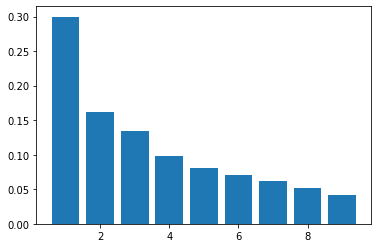

[(2, 3, 5, 1, 8, 4, 7, 6, 9),
 (0.1625, 0.1337, 0.0806, 0.2997, 0.0513, 0.0988, 0.0616, 0.0708, 0.041)]

In [172]:
# NUMBER ASSEMBLY FROM DIGITS USING BENFORD DISTRIBUTIONS ON FIRST TWO DIGITS
samples = 10000
max_digits = 5

first_digit_dist = stats.rv_discrete(name='benford_first_digit', values=ratios_first_digit)
second_digit_dist = stats.rv_discrete(name='benford_second_digit', values=ratios_second_digit)

rand_first_digits = first_digit_dist.rvs(size=samples)
rand_second_digits = second_digit_dist.rvs(size=samples)

nums = []
for s in range(samples):
    num_digits = random.randrange(1, 6)
    num = 0
    for i in range(num_digits):
        num *= 10
        if i == 0:
            num += rand_first_digits[s]
        elif i == 1:
            num += rand_second_digits[s]
        else:
            num += random.randrange(0, 9)
    nums.append(int(num))

assembled_nums = nums
plot_benford(nums, n=1)

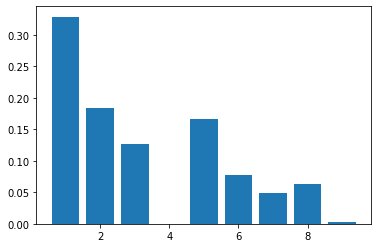

[(2, 5, 8, 1, 3, 7, 6, 9),
 (0.184, 0.167, 0.064, 0.329, 0.127, 0.049, 0.077, 0.003)]

In [120]:
# ASSEMBLED NUMBERS WITH ARBITRARY BASE CHANGE AND MULTIPLICATION
base, m = 8, 5.12345
nums2 = [int(digits(math.floor(r), base)) * m for r in nums]
plot_benford(nums2, n=1)

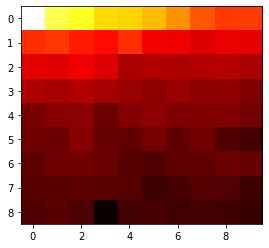

In [173]:
# RELATIONSHIP BETWEEN FIRST AND SECOND DIGITS
def nums_to_heatmap(nums):
    first_digits = [n_digit(num, n=1) for num in nums]
    second_digits = [n_digit(num, n=2) for num in nums]

    counts = Counter(zip(first_digits, second_digits))
    im = np.zeros(shape=(9, 10), dtype=int)
    for (first, second), freq in counts.items():
        im[first - 1, second] = freq
    
    plt.imshow(im, cmap='hot', interpolation='nearest')
    plt.show()
    return im


nums = gen_benford(samples=10000)
im1 = nums_to_heatmap(nums)

Distribution of second digit values is more skewed for lower first digit values!

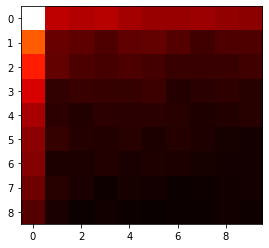

In [174]:
im2 = nums_to_heatmap(assembled_nums)

### Postulation

All things which are measurable in the universe have values which are a product of many factors. Each of those factors is itself a product of many other factors.
The random multiplication of 1.01 and 0.99 is used to simulate the "mathematical processing" carried out by history. This processing gives rise to Benford's Law... for some reason.

## Explanation from Reddit
https://www.reddit.com/r/math/comments/4smdbf/why_does_benfords_law_work/